In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

09/29/2019 13:58:22 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
09/29/2019 13:58:38 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
09/29/2019 13:58:55 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
09/29/2019 13:59:11 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-11_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, sm

In [7]:
dtfa.load_state('data/affvids_norest_k100_n1000_09282019_000055')

In [8]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [9]:
def block_task_labeler(block):
    return task_labeler(block.task)

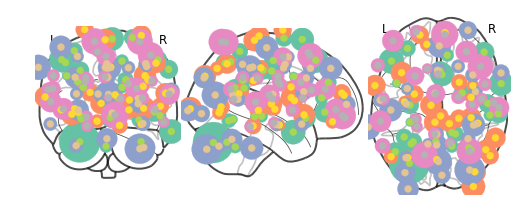

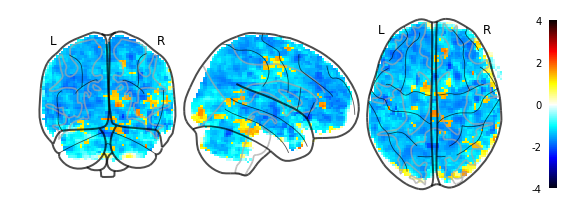

09/29/2019 14:20:35 Reconstruction Error (Frobenius Norm): 1.11354626e+03 out of 1.45055640e+03


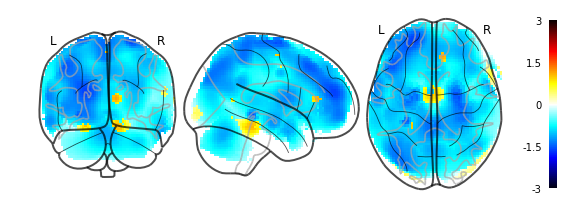

09/29/2019 14:20:37 Reconstruction Error (Frobenius Norm): 1.11354626e+03 out of 1.45055640e+03


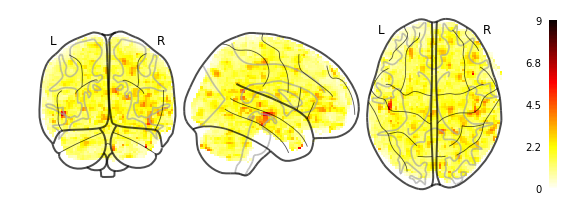

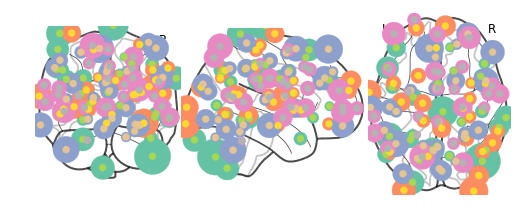

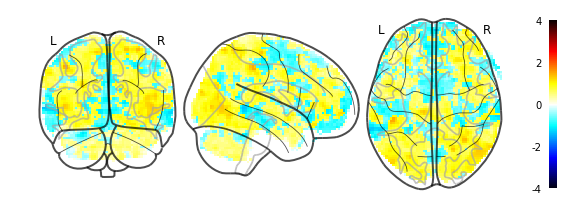

09/29/2019 14:20:43 Reconstruction Error (Frobenius Norm): 1.05483423e+03 out of 1.18316016e+03


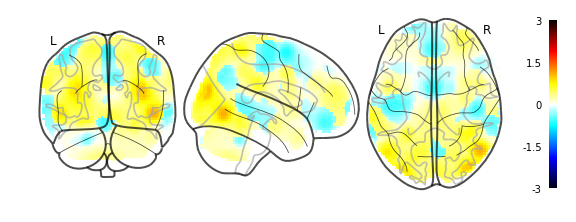

09/29/2019 14:20:45 Reconstruction Error (Frobenius Norm): 1.05483423e+03 out of 1.18316016e+03


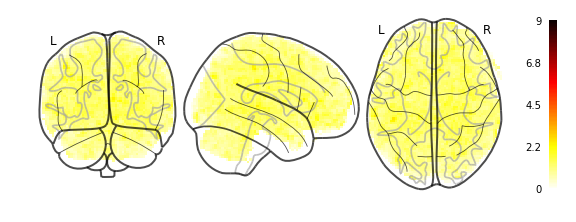

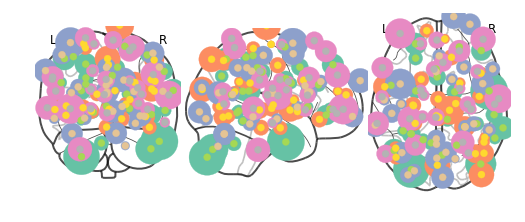

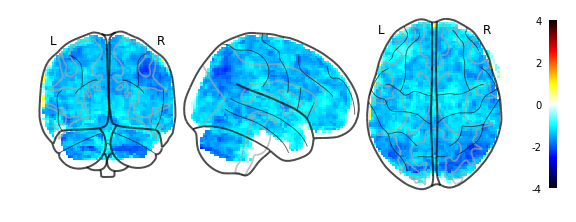

09/29/2019 14:20:50 Reconstruction Error (Frobenius Norm): 1.09334253e+03 out of 1.58652185e+03


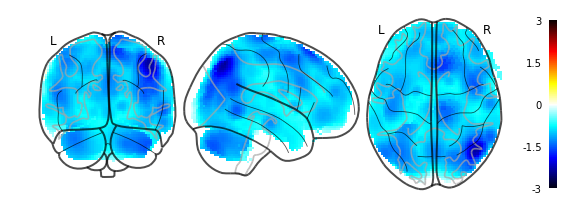

09/29/2019 14:20:53 Reconstruction Error (Frobenius Norm): 1.09334253e+03 out of 1.58652185e+03


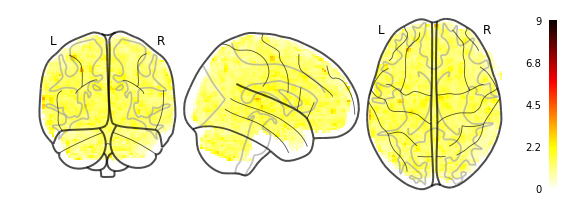

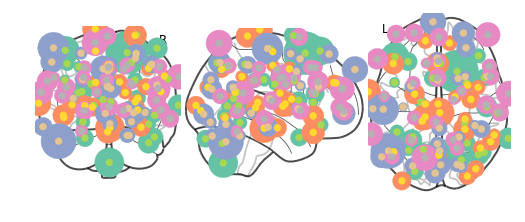

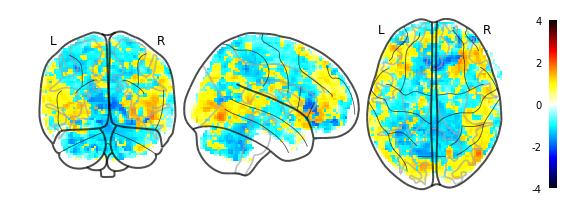

09/29/2019 14:20:58 Reconstruction Error (Frobenius Norm): 1.07471252e+03 out of 1.25962793e+03


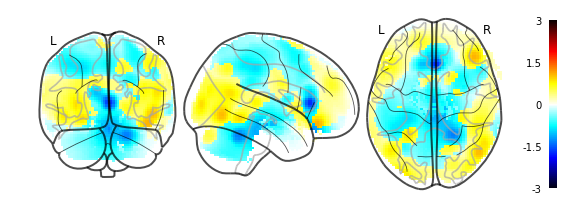

09/29/2019 14:21:00 Reconstruction Error (Frobenius Norm): 1.07471252e+03 out of 1.25962793e+03


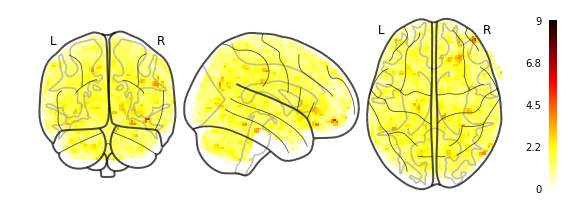

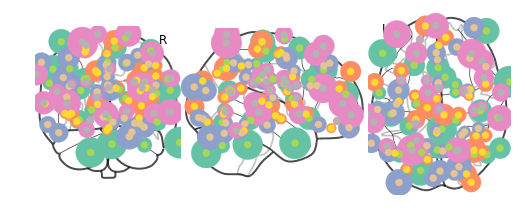

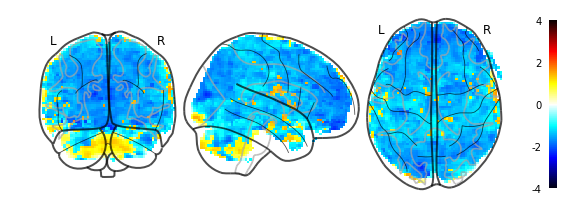

09/29/2019 14:21:05 Reconstruction Error (Frobenius Norm): 9.70384949e+02 out of 1.42871838e+03


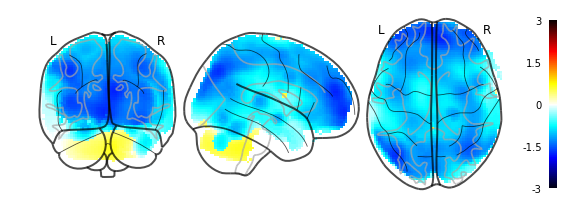

09/29/2019 14:21:07 Reconstruction Error (Frobenius Norm): 9.70384949e+02 out of 1.42871838e+03


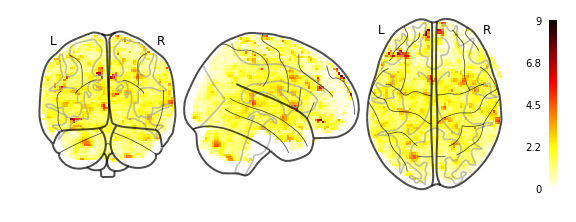

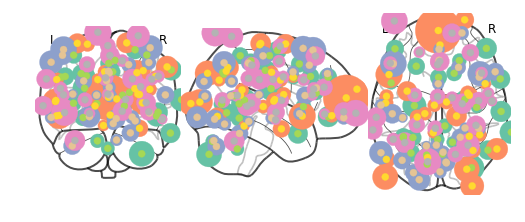

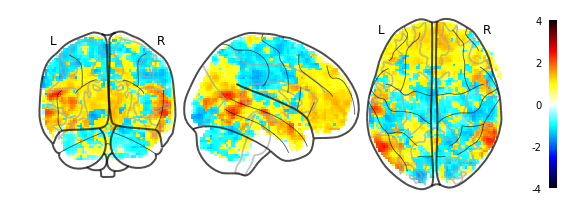

09/29/2019 14:21:13 Reconstruction Error (Frobenius Norm): 1.06226392e+03 out of 1.24866333e+03


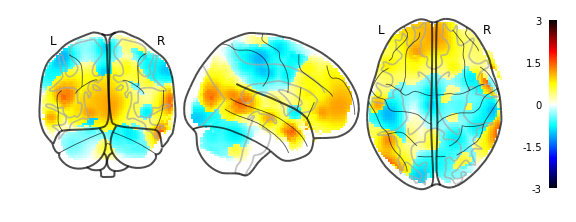

09/29/2019 14:21:15 Reconstruction Error (Frobenius Norm): 1.06226392e+03 out of 1.24866333e+03


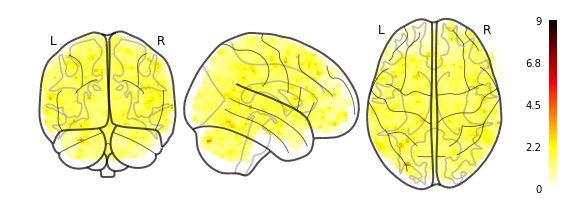

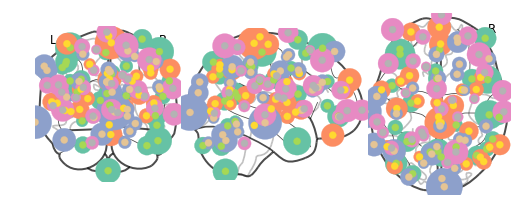

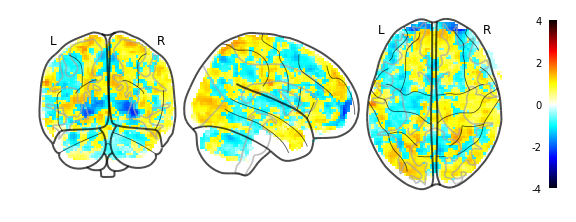

09/29/2019 14:21:20 Reconstruction Error (Frobenius Norm): 1.13498572e+03 out of 1.30958423e+03


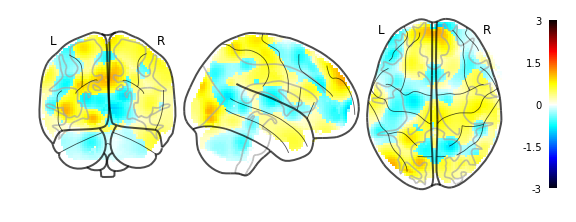

09/29/2019 14:21:22 Reconstruction Error (Frobenius Norm): 1.13498572e+03 out of 1.30958423e+03


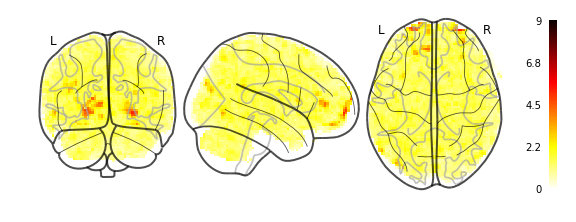

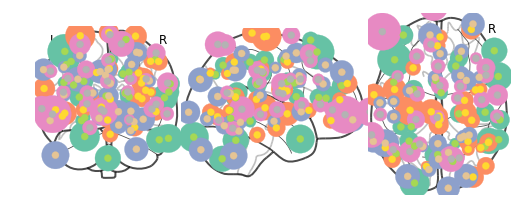

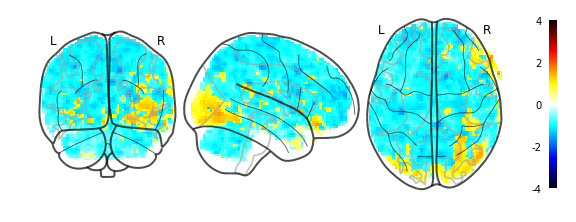

09/29/2019 14:21:28 Reconstruction Error (Frobenius Norm): 9.80832764e+02 out of 1.19024634e+03


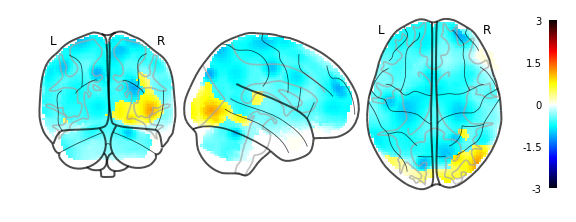

09/29/2019 14:21:30 Reconstruction Error (Frobenius Norm): 9.80832764e+02 out of 1.19024634e+03


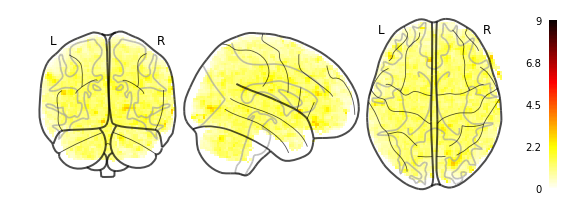

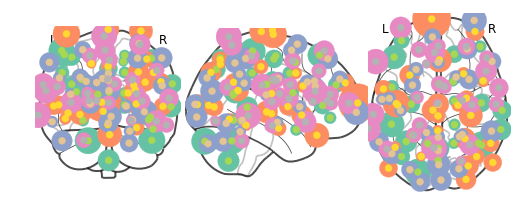

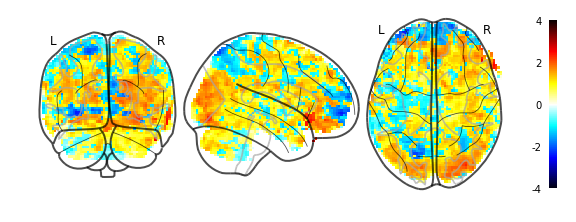

09/29/2019 14:21:35 Reconstruction Error (Frobenius Norm): 1.18321570e+03 out of 1.38050598e+03


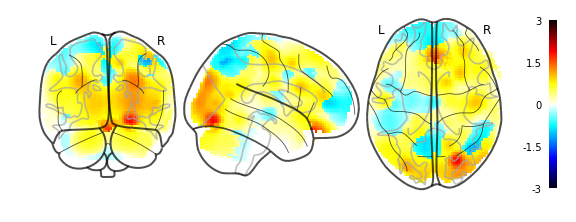

09/29/2019 14:21:37 Reconstruction Error (Frobenius Norm): 1.18321570e+03 out of 1.38050598e+03


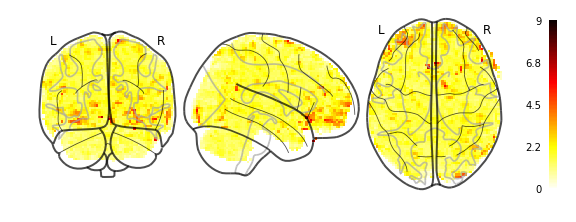

In [13]:
validation_filter = affvids_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in enumerate(dtfa._blocks) if validation_filter(block)]

for index in validation_blocks[0:-1:2]:
    dtfa.plot_factor_centers(index)
    dtfa.plot_original_brain(index, labeler=lambda b: None, zscore_bound=4., t=None)
    dtfa.plot_reconstruction(index, labeler=lambda b: None, t=None)
    dtfa.plot_reconstruction_diff(index, labeler=lambda b: None, t=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


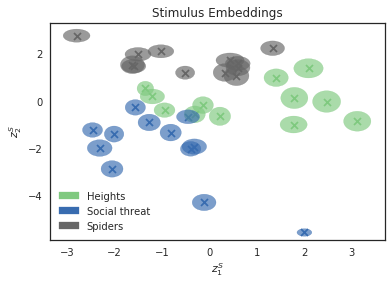

In [14]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [15]:
def subject_labeler(subject):
    return 'Subject %d' % subject

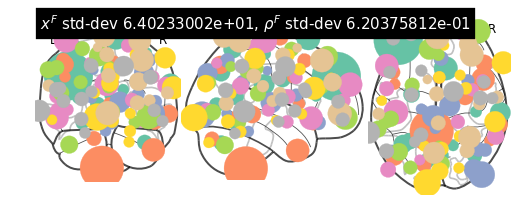

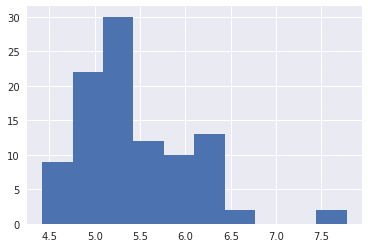

(<nilearn.plotting.displays.OrthoProjector at 0x7fd3e8249470>,
 tensor([[-3.7021e+01, -5.8386e+01,  6.4148e+01],
         [ 6.5381e+01, -2.5227e+01,  2.6991e+01],
         [-2.7243e+01, -5.5687e+01, -1.4033e+01],
         [-4.1933e+01,  5.0730e+01,  3.5504e+01],
         [ 1.5381e+00, -7.0508e+01,  3.9801e+01],
         [ 1.5673e+00,  2.9517e+01,  1.4407e+01],
         [ 3.8326e+01, -7.0337e+01, -3.4527e+01],
         [ 3.9863e+01, -2.4211e+01,  5.9378e+01],
         [-1.1201e+01, -7.5340e+01,  5.4534e+00],
         [ 1.5758e+01, -5.9836e+01,  2.0875e+01],
         [-2.9971e+01, -5.5256e+01,  1.4098e+01],
         [-2.7955e+01, -6.0102e+00,  3.2655e+01],
         [ 8.0638e+00,  2.1284e+01,  7.5641e+01],
         [ 1.1461e+00,  1.1578e+01,  6.6177e+00],
         [ 4.8622e+01,  2.6550e+01, -1.2080e+01],
         [-4.5917e+01, -7.1409e+01,  4.7504e+01],
         [ 4.7378e+01,  1.0000e+01, -4.2401e+01],
         [ 2.8348e+01, -8.5101e+00,  7.6914e+01],
         [-4.7402e+01,  1.7307e+01,  

In [16]:
dtfa.visualize_factor_embedding()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


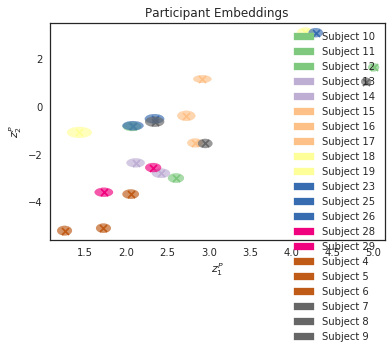

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [18]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [19]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [20]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [21]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [22]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [23]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [24]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [25]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


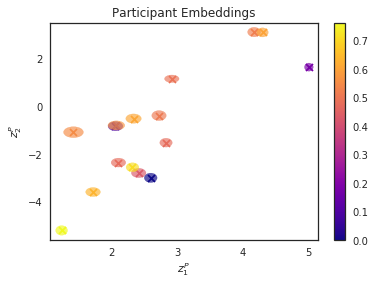

In [36]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_heights_subject_embedding.pdf')

In [27]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


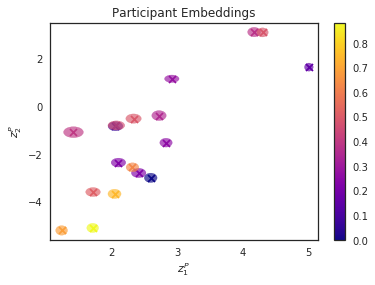

In [35]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_spiders_subject_embedding.pdf')

In [29]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


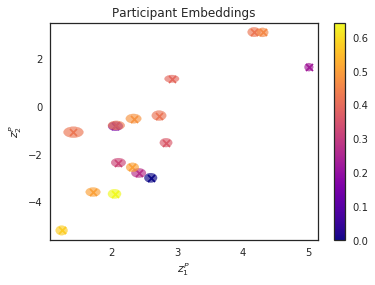

In [34]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_social_subject_embedding.pdf')

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


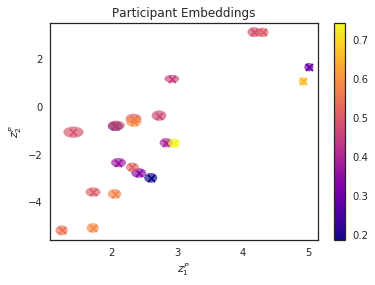

In [37]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_all_subject_embedding.pdf')